In [3]:
import os
import pandas as pd
import numpy as np
from datetime import datetime

In [4]:
scope_traces=[] #this will be the list of dataframes
file_names=os.listdir('cd/cd/2020/01 2020')

In [5]:
file_names[0]

'01_01_2020.xlsx'

In [6]:
file_names_months=os.listdir('cd/cd/2020/')

In [18]:
def extract_chp(year):

    file_names_months=os.listdir('cd/cd/'+year+'/')
    df_TZ_months=[None]*len(file_names_months)
    df_KA_months=[None]*len(file_names_months)
    column_names_TZ=["sat","B3 generator","B3 prag, MWh/h", "B3 Q,(MVArh/h)","B4 generator","B4 prag, MWh/h", "B4 Q,(MVArh/h)",
                            "B5 generator","B5 prag, MWh/h", "B5 Q,(MVArh/h)","B6 generator","B6 prag, MWh/h", "B6 Q,(MVArh/h)",
                            "TE_TZ generator","TE_TZ prag, MWh/h", "Q prag,(MVArh/h)","Q gen,(MVArh/h)","110kV-kV"]
    column_names_KA=["sat","B5 generator","B5 prag, MWh/h", "B5 Q,(MVArh/h)","B5 U,(kV)","B6 generator","B6 prag, MWh/h", "B6 Q,(MVArh/h)","B6 U,(kV)",
                            "B7 generator","B7 prag, MWh/h", "B7 Q,(MVArh/h)","B7 U,(kV)","Vl.potr P, MWh/h", "Vl.potr Q,(MVArh/h)",
                            "TE_KA generator","TE_KA prag, MWh/h", "TE_KA Q * (MVArh/h)"]
    skipr_TZ= list(range(0,6))
    skipr_KA= list(range(0,8))
    for j,file_m in enumerate(file_names_months):
        file_names=os.listdir('cd/cd/'+year+'/'+file_m)
        df_TZ=[None]*len(file_names)
        df_KA=[None]*len(file_names)
        #df_all_files_TZ=[None]*len(file_names)


        for k,file in enumerate(file_names):

            xls=pd.ExcelFile('cd/cd/'+year+'/'+file_m+"/"+file)

            df_TZ[k]=pd.read_excel('cd/cd/'+year+'/'+file_m+"/"+file, sheet_name="TE TUZLA", usecols="A:R",header=None,skiprows= skipr_TZ)
            df_KA[k]=pd.read_excel('cd/cd/'+year+'/'+file_m+"/"+file, sheet_name="TE KAKANJ", usecols="A:R",header=None,skiprows= skipr_KA)

            df_TZ[k].columns=column_names_TZ
            df_KA[k].columns=column_names_KA
            #print(file,df_KA[k].loc[0,"sat"])
           # print(file,df_TZ[k].loc[0,"sat"])
            #start_TZ=int(df_TZ[k][df_TZ[k]["sat"]==1].index.values)
            end_TZ=int(df_TZ[k][df_TZ[k]["sat"]==24].index.values)
           # start_KA=int(df_KA[k][df_KA[k]["sat"]==1].index.values)
            end_KA=int(df_KA[k][df_KA[k]["sat"]==24].index.values)
            df_TZ[k]=df_TZ[k].loc[:end_TZ,:]
            df_KA[k]=df_KA[k].loc[:end_KA,:]
            #df_TZ=df_TZ.loc[]    
        df_all_files_KA=pd.concat(df_KA,axis=0,ignore_index=True,names=column_names_KA)
        df_all_files_TZ=pd.concat(df_TZ,axis=0,ignore_index=True,names=column_names_TZ)

        df_TZ_months[j]=df_all_files_TZ
        df_KA_months[j]=df_all_files_KA

    df_all_files_KA_year=pd.concat(df_KA_months,axis=0,ignore_index=True,names=column_names_KA)
    df_all_files_TZ_year=pd.concat(df_TZ_months,axis=0,ignore_index=True,names=column_names_TZ)
    return df_all_files_KA_year,df_all_files_TZ_year

In [ ]:
df_all_files_KA_year,df_all_files_TZ_year=extract_chp(str(2019))

In [21]:
df_all_files_TZ_year.to_excel("TE_TZ_2019.xlsx")
df_all_files_KA_year.to_excel("TE_KA_2019.xlsx")

In [6]:
df_all_files_KA_year.columns

Index(['sat', 'B5 generator', 'B5 prag, MWh/h', 'B5 Q,(MVArh/h)', 'B5 U,(kV)',
       'B6 generator', 'B6 prag, MWh/h', 'B6 Q,(MVArh/h)', 'B6 U,(kV)',
       'B7 generator', 'B7 prag, MWh/h', 'B7 Q,(MVArh/h)', 'B7 U,(kV)',
       'Vl.potr P, MWh/h', 'Vl.potr Q,(MVArh/h)', 'TE_KA generator',
       'TE_KA prag, MWh/h', 'TE_KA Q * (MVArh/h)'],
      dtype='object')

In [7]:
df_all_files_TZ_year.drop(df_all_files_TZ_year[df_all_files_TZ_year["TE_TZ prag, MWh/h"]=="Q (MVArh/h)"].index,inplace=True)

In [7]:
df_all_files_TZ_year.to_excel("TE_TZ_2020.xlsx")
df_all_files_KA_year.to_excel("TE_KA_2020.xlsx")

In [13]:
pd.to_numeric(df_all_files_TZ_year["TE_TZ prag, MWh/h"]).max()

624.45

In [14]:
pd.to_numeric(df_all_files_KA_year["TE_KA prag, MWh/h"]).max()

476.57000000000005

<AxesSubplot:>

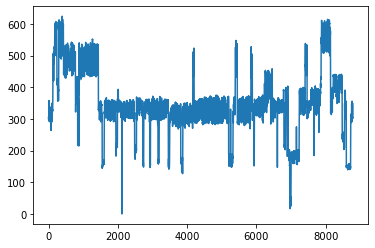

In [15]:
df_all_files_TZ_year["TE_TZ prag, MWh/h"].plot()

<AxesSubplot:>

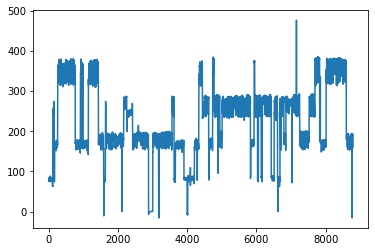

In [16]:
df_all_files_KA_year["TE_KA prag, MWh/h"].plot()

In [8]:
"TE_TZ prag, MWh/h"]>0].min()

sat                          1
B3 generator                 0
B3 prag, MWh/h               0
B3 Q,(MVArh/h)       -0.002786
B4 generator             0.015
B4 prag, MWh/h               0
B4 Q,(MVArh/h)        0.005233
B5 generator                 0
B5 prag, MWh/h       -0.814256
B5 Q,(MVArh/h)      -12.048458
B6 generator             0.045
B6 prag, MWh/h           -0.05
B6 Q,(MVArh/h)      -57.136316
TE_TZ generator        30.2232
TE_TZ prag, MWh/h        16.59
Q prag,(MVArh/h)    -54.414641
Q gen,(MVArh/h)            0.0
110kV-kV              3.347481
dtype: object

In [18]:
def extract_chp_other(year):

    file_names_months=os.listdir('cd/cd/'+year+'/')
    df_production_months=[None]*len(file_names_months)
    df_prod_months=[None]*len(file_names_months)
    column_names_prod=["sat","HE Jablanica, MWh","HE Grabovica, MWh", "HE Salakovac, MWh","TE Tuzla","TE Kakanj"]
 
    skipr_prod= list(range(0,10))
    for j,file_m in enumerate(file_names_months):
        file_names=os.listdir('cd/cd/'+year+'/'+file_m)
        df_prod=[None]*len(file_names)
    
        #df_all_files_TZ=[None]*len(file_names)


        for k,file in enumerate(file_names):

            xls=pd.ExcelFile('cd/cd/'+year+'/'+file_m+"/"+file)
            df_prod[k]=pd.read_excel('cd/cd/'+year+'/'+file_m+"/"+file, sheet_name="Dispecerska Lista", usecols="A,B,F,J,N,Q",header=None,skiprows= skipr_prod)
            
            df_prod[k].columns=column_names_prod
     
            #print(file,df_KA[k].loc[0,"sat"])
           # print(file,df_TZ[k].loc[0,"sat"])
            #start_TZ=int(df_TZ[k][df_TZ[k]["sat"]==1].index.values)
            end_prod=int(df_prod[k][df_prod[k]["sat"]==24].index.values)
           # start_KA=int(df_KA[k][df_KA[k]["sat"]==1].index.values)

        
            df_prod[k]=df_prod[k].loc[:end_prod,:]
            
            
            #df_TZ=df_TZ.loc[]    
   
        df_all_files_prod=pd.concat(df_prod,axis=0,ignore_index=True,names=column_names_prod)

        df_prod_months[j]=df_all_files_prod

    df_all_files_prod_year=pd.concat(df_prod_months,axis=0,ignore_index=True,names=column_names_prod)
    return df_all_files_prod_year

In [19]:
df_all_files_prod_year_2019=extract_chp_other(str(2019))
df_all_files_prod_year_2020=extract_chp_other(str(2020))

In [20]:
df_all_files_prod_year_2019

,sat,"HE Jablanica, MWh","HE Grabovica, MWh","HE Salakovac, MWh",TE Tuzla,TE Kakanj
0,1,99.024223,0.000000,0.174827,151.702835,188.00
1,2,88.384087,0.000000,0.164930,137.306859,188.00
2,3,65.685389,0.000000,0.151313,138.591555,188.00
3,4,22.56605,0.000000,0.153114,137.244599,188.00
4,5,0.003052,0.000000,0.148833,137.084138,188.00
...,...,...,...,...,...,...
8779,20,149.05,54.111000,129.844000,357.77,85.27
8780,21,134.134,47.384000,80.036000,350.45,85.54
8781,22,156.464,54.353000,46.200000,334.84,84.92
8782,23,157.322,56.096000,45.232000,316.74,84.13


In [21]:
df_all_files_prod_year_2020

,sat,"HE Jablanica, MWh","HE Grabovica, MWh","HE Salakovac, MWh",TE Tuzla,TE Kakanj
0,1,119.655027,1.634625,0.121419,300.767688,81.00
1,2,98.438968,0.000000,0.090836,303.342831,82.00
2,3,55.034549,0.000000,0.097226,305.134972,81.00
3,4,37.978396,0.000000,0.084415,307.77306,82.00
4,5,21.852971,0.000000,0.091652,303.669367,82.00
...,...,...,...,...,...,...
8779,20,113.96,50.384000,131.604000,0.0,342.57
8780,21,108.812,34.703000,56.760000,0.0,341.88
8781,22,95.964,29.863000,34.936000,0.0,328.81
8782,23,143.836,29.814000,34.980000,0.0,302.45


In [24]:
df_all_files_prod_year_2019["TE"]=df_all_files_prod_year_2019[df_all_files_prod_year_2019.columns[4:]].sum(axis=1)
df_all_files_prod_year_2019["HE"]=df_all_files_prod_year_2019[df_all_files_prod_year_2019.columns[1:4]].sum(axis=1)

df_all_files_prod_year_2020["TE"]=df_all_files_prod_year_2020[df_all_files_prod_year_2020.columns[4:]].sum(axis=1)
df_all_files_prod_year_2020["HE"]=df_all_files_prod_year_2020[df_all_files_prod_year_2020.columns[1:4]].sum(axis=1)

In [31]:
df_all_files_prod_year_2019.to_excel("TE_HE_EPBIH_2019.xlsx")
df_all_files_prod_year_2020.to_excel("TE_HE_EPBIH_2020.xlsx")

In [32]:
df_all_files_prod_year_2020[df_all_files_prod_year_2020["TE"]>0]["TE"].min()

142.62199999999999

In [34]:
df_all_files_prod_year_2020=df_all_files_prod_year_2020.assign(Timestamp=pd.date_range("2020-01-01 01:00:00","2021-01-01", freq="1H"))

In [35]:
df_all_files_prod_year_2020

,sat,"HE Jablanica, MWh","HE Grabovica, MWh","HE Salakovac, MWh",TE Tuzla,TE Kakanj,HE,TE,Timestamp
0,1,119.655027,1.634625,0.121419,300.767688,81.00,121.411071,503.178760,2020-01-01 01:00:00
1,2,98.438968,0.000000,0.090836,303.342831,82.00,98.529805,483.872636,2020-01-01 02:00:00
2,3,55.034549,0.000000,0.097226,305.134972,81.00,55.131775,441.266747,2020-01-01 03:00:00
3,4,37.978396,0.000000,0.084415,307.77306,82.00,38.062810,427.835871,2020-01-01 04:00:00
4,5,21.852971,0.000000,0.091652,303.669367,82.00,21.944624,407.613990,2020-01-01 05:00:00
...,...,...,...,...,...,...,...,...,...
8779,20,113.96,50.384000,131.604000,0.0,342.57,295.948000,638.518000,2020-12-31 20:00:00
8780,21,108.812,34.703000,56.760000,0.0,341.88,200.275000,542.155000,2020-12-31 21:00:00
8781,22,95.964,29.863000,34.936000,0.0,328.81,160.763000,489.573000,2020-12-31 22:00:00
8782,23,143.836,29.814000,34.980000,0.0,302.45,208.630000,511.080000,2020-12-31 23:00:00


In [36]:
df_all_files_prod_year_2020["Month"]=df_all_files_prod_year_2020["Timestamp"].dt.month

<AxesSubplot:xlabel='Month'>

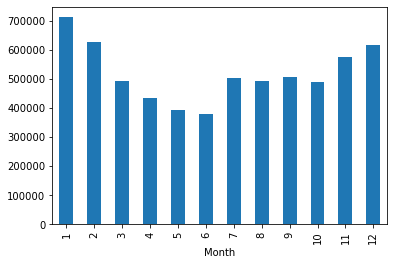

In [37]:
df_all_files_prod_year_2020.groupby("Month")["TE"].sum().plot(kind="bar")

In [51]:
df_all_files_prod_year_2020["TE"].min()

0.0